
### Step 1: Load the Dataset

We load the Bank Marketing dataset using pandas. Make sure the `bank.csv` file is in the same directory as this notebook.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\This PC\OneDrive\OneDrive - Islamabad Model Postgraduate College of Commerce H-8 4 Islamabad\SZABIST WORKING ZONE\SZABIST WORKING S 4\DATASETS\bank+marketing\bank.csv")
df.head()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
df.duplicated().sum()

0

### Step 2: Encode Categorical Features

We convert all categorical (string) columns into numeric using `LabelEncoder`, which is required for model training.


In [15]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataset
df_clean = df.copy()

# Encode categorical features using LabelEncoder for simplicity
label_encoders = {}
for col in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

df_clean.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


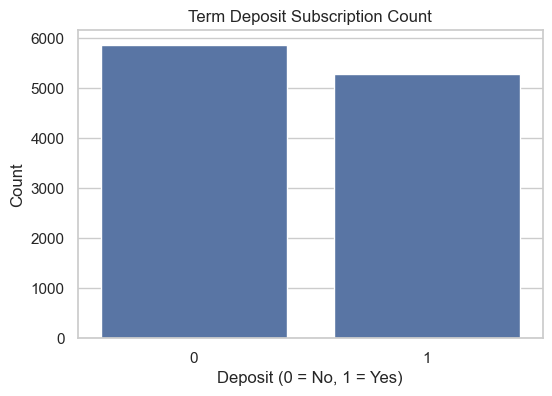

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot 1: Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df_clean)
plt.title('Term Deposit Subscription Count')
plt.xlabel('Deposit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



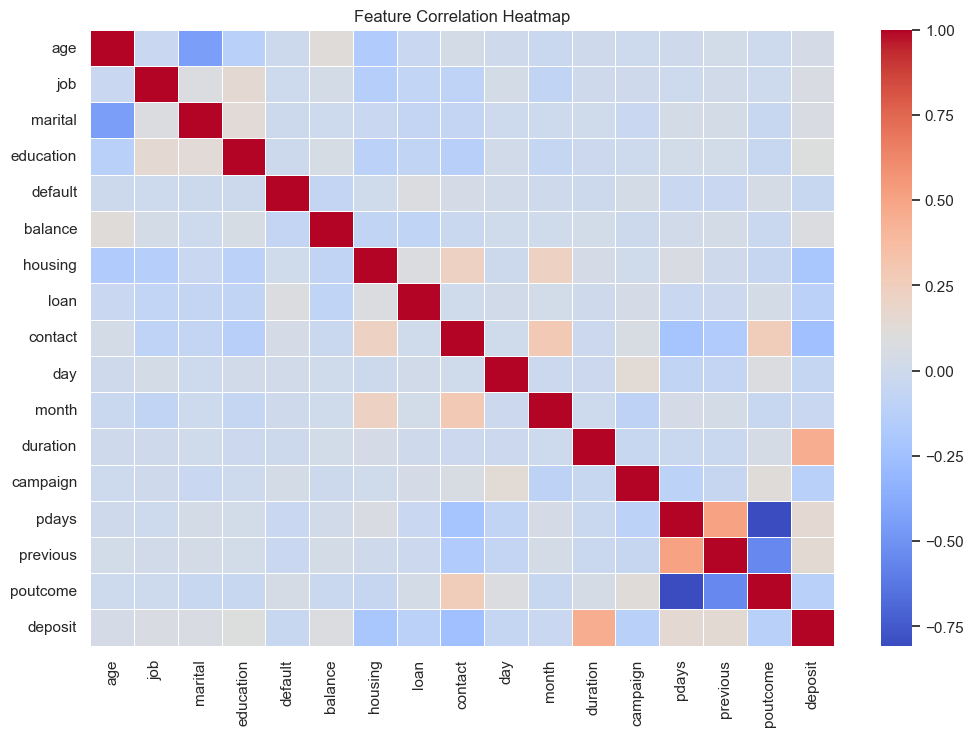

In [18]:
# Plot 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



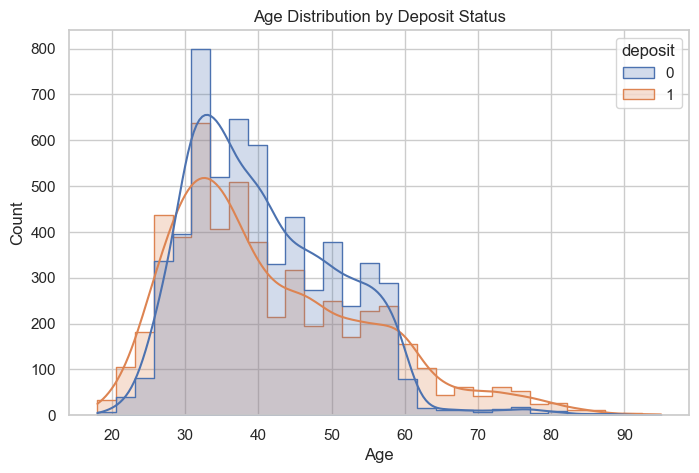

In [20]:
# Plot 3: Age distribution by deposit
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='age', hue='deposit', bins=30, kde=True, element='step')
plt.title('Age Distribution by Deposit Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



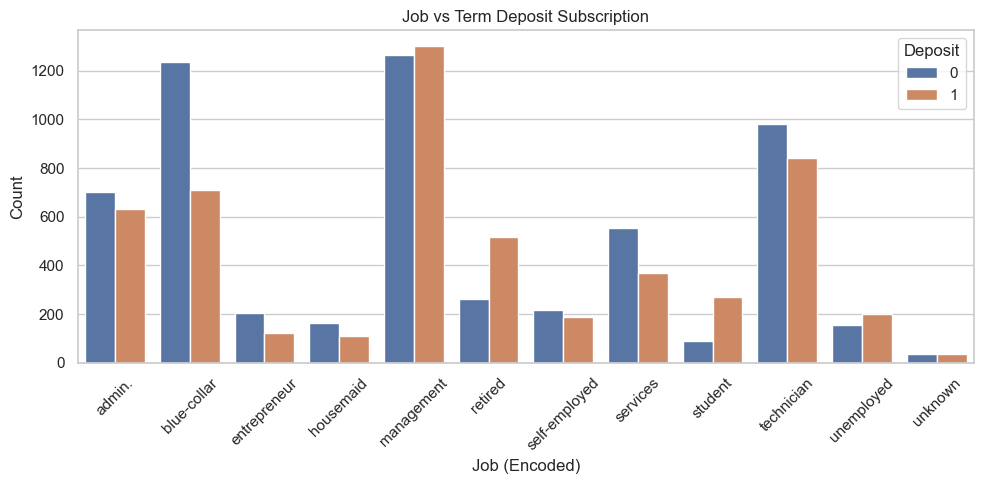

In [22]:
# Plot 4: Job vs Deposit
plt.figure(figsize=(10, 5))
job_labels = label_encoders['job'].classes_
sns.countplot(x='job', hue='deposit', data=df_clean)
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job (Encoded)')
plt.ylabel('Count')
plt.xticks(ticks=range(len(job_labels)), labels=job_labels, rotation=45)
plt.legend(title='Deposit')
plt.tight_layout()
plt.show()


### Step 3: Split the Dataset

We split the dataset into training and testing sets using an 80-20 ratio.


In [24]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('deposit', axis=1)
y = df_clean['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Train Models

We train two classifiers:
- Logistic Regression (a simple linear model)
- Random Forest (an ensemble tree-based model)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 5: Evaluate the Models

We evaluate both models using:
- Confusion Matrix
- Classification Report (Precision, Recall, F1-Score)
- ROC Curve and AUC


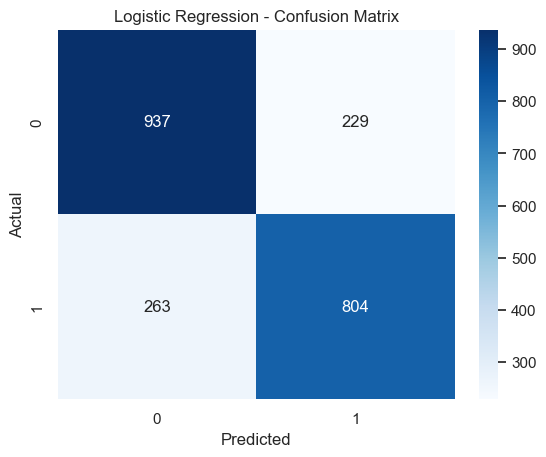

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.78      0.75      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



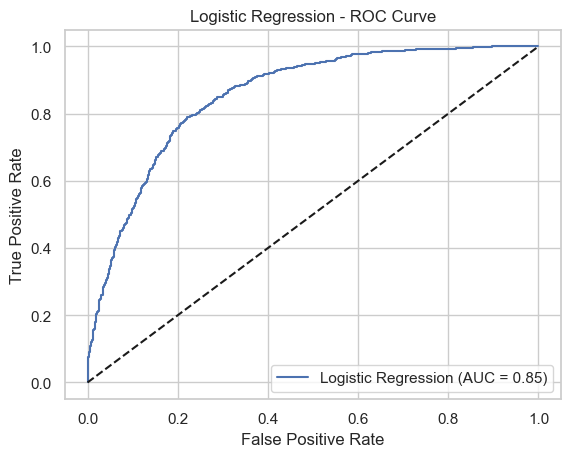

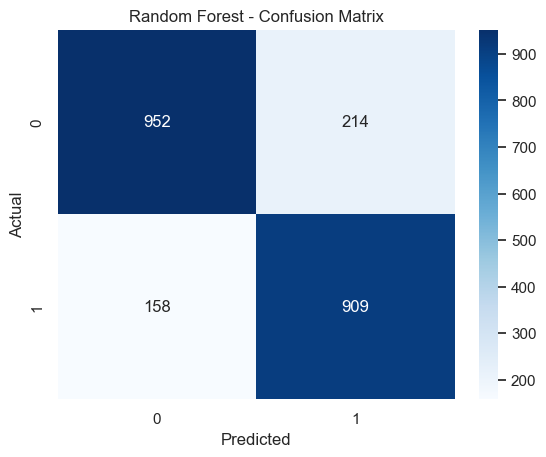

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



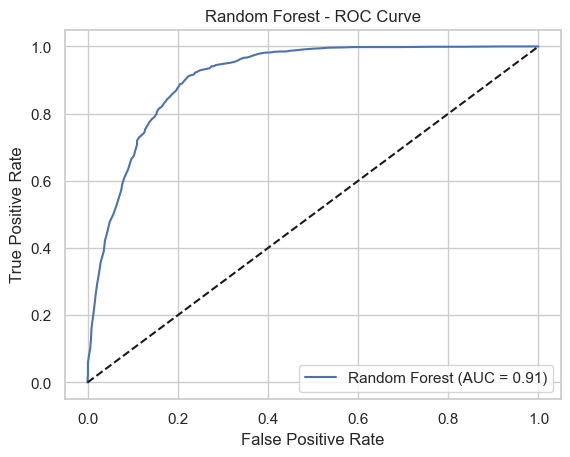

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # F1 Score
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Evaluate both models
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")


In [33]:
!pip install shap
import shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -------- ------------------------------- 112.6/545.3 kB 6.4 MB/s eta 0:00:01
   -------- ------------------------------- 112.6/545.3 kB 6.4 MB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.3 kB 762.6 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.3 kB 762.6 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.3 kB 762.6 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.3 kB 762.6 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/545.3 kB 327.7 kB/s eta 0:00:02
   ------------ ------------------------- 174.1/545.3 kB 327.7 kB/s eta 0:00:02
   --------------- ---------------------- 225.3/545.3 kB 335.5 kB/s eta 0:00:01
   ---------------- --------------------- 235.5/545.3 kB 313.3 kB/s eta 0:00:01
   ----------------------- -------------- 337.9/545.3 kB 355.4 kB/s eta 0:00:01
   ----------------------- -------------- 337.9/5

### SHAP Summary Plot

This plot shows which features most influence the model across all samples.


In [ ]:

# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Explain 5 predictions
for i in range(5):
    print(f"\nExplanation for Test Sample {i}:")
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[i], matplotlib=True)


In [ ]:
shap.summary_plot(shap_values[1], X_test)